In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as et
sns.set_style('darkgrid')

In [2]:
holidays_df = pd.read_xml('holidays.xml')

In [3]:
holidays_df.head()

,date,description
0,2012-01-02,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-07-04,Independence Day


In [4]:
weather_df = pd.read_csv('weather-sfcsv.csv', date_parser=['Year', 'Day', 'Month', 'Hour'])

In [5]:
weather_df.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [6]:
train_df = pd.read_csv('train.csv')

In [7]:
train_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [8]:
train_df['Timestamp'] = pd.to_datetime(train_df.timestamp)

In [9]:
train_df['Year'] = train_df.Timestamp.dt.year
train_df['Month'] = train_df.Timestamp.dt.month
train_df['Day'] = train_df.Timestamp.dt.day
train_df['Hour'] = train_df.Timestamp.dt.hour
train_df['Minute'] = train_df.Timestamp.dt.minute
train_df['Second'] = train_df.Timestamp.dt.second

In [10]:
train_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Side,Severity,timestamp,Timestamp,Year,Month,Day,Hour,Minute,Second
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,...,R,2,2016-03-25 15:13:02,2016-03-25 15:13:02,2016,3,25,15,13,2
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,...,R,2,2020-05-05 19:23:00,2020-05-05 19:23:00,2020,5,5,19,23,0
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,...,R,3,2016-09-16 19:57:16,2016-09-16 19:57:16,2016,9,16,19,57,16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,...,R,1,2020-03-29 19:48:43,2020-03-29 19:48:43,2020,3,29,19,48,43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,...,R,2,2019-10-09 08:47:00,2019-10-09 08:47:00,2019,10,9,8,47,0


In [11]:
train_df.drop(columns=['timestamp'], inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            6407 non-null   int64         
 1   Lat           6407 non-null   float64       
 2   Lng           6407 non-null   float64       
 3   Bump          6407 non-null   bool          
 4   Distance(mi)  6407 non-null   float64       
 5   Crossing      6407 non-null   bool          
 6   Give_Way      6407 non-null   bool          
 7   Junction      6407 non-null   bool          
 8   No_Exit       6407 non-null   bool          
 9   Railway       6407 non-null   bool          
 10  Roundabout    6407 non-null   bool          
 11  Stop          6407 non-null   bool          
 12  Amenity       6407 non-null   bool          
 13  Side          6407 non-null   object        
 14  Severity      6407 non-null   int64         
 15  Timestamp     6407 non-null   datetime

In [13]:
train_df.describe()

,ID,Lat,Lng,Distance(mi),Severity,Year,Month,Day,Hour,Minute,Second
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,3203.000000,37.765653,-122.405990,0.135189,2.293429,2018.407835,6.744498,15.656626,12.873888,29.958327,22.699391
std,1849.685919,0.032555,0.028275,0.396360,0.521225,1.375794,3.568445,8.750849,5.824203,17.188764,19.698045
min,0.000000,37.609619,-122.510440,0.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1601.500000,37.737096,-122.412210,0.000000,2.000000,2017.000000,4.000000,8.000000,8.000000,15.000000,0.000000
50%,3203.000000,37.768238,-122.404835,0.000000,2.000000,2019.000000,7.000000,16.000000,14.000000,30.000000,21.000000
75%,4804.500000,37.787813,-122.392477,0.041000,3.000000,2020.000000,10.000000,23.000000,17.000000,45.000000,40.000000
max,6406.000000,37.825626,-122.349734,6.820000,4.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [14]:
categorical_data = [x for x in train_df.columns if train_df[x].dtype in ['bool', 'object']]

In [15]:
figure_names = [x + ' Accidents Count' for x in categorical_data]

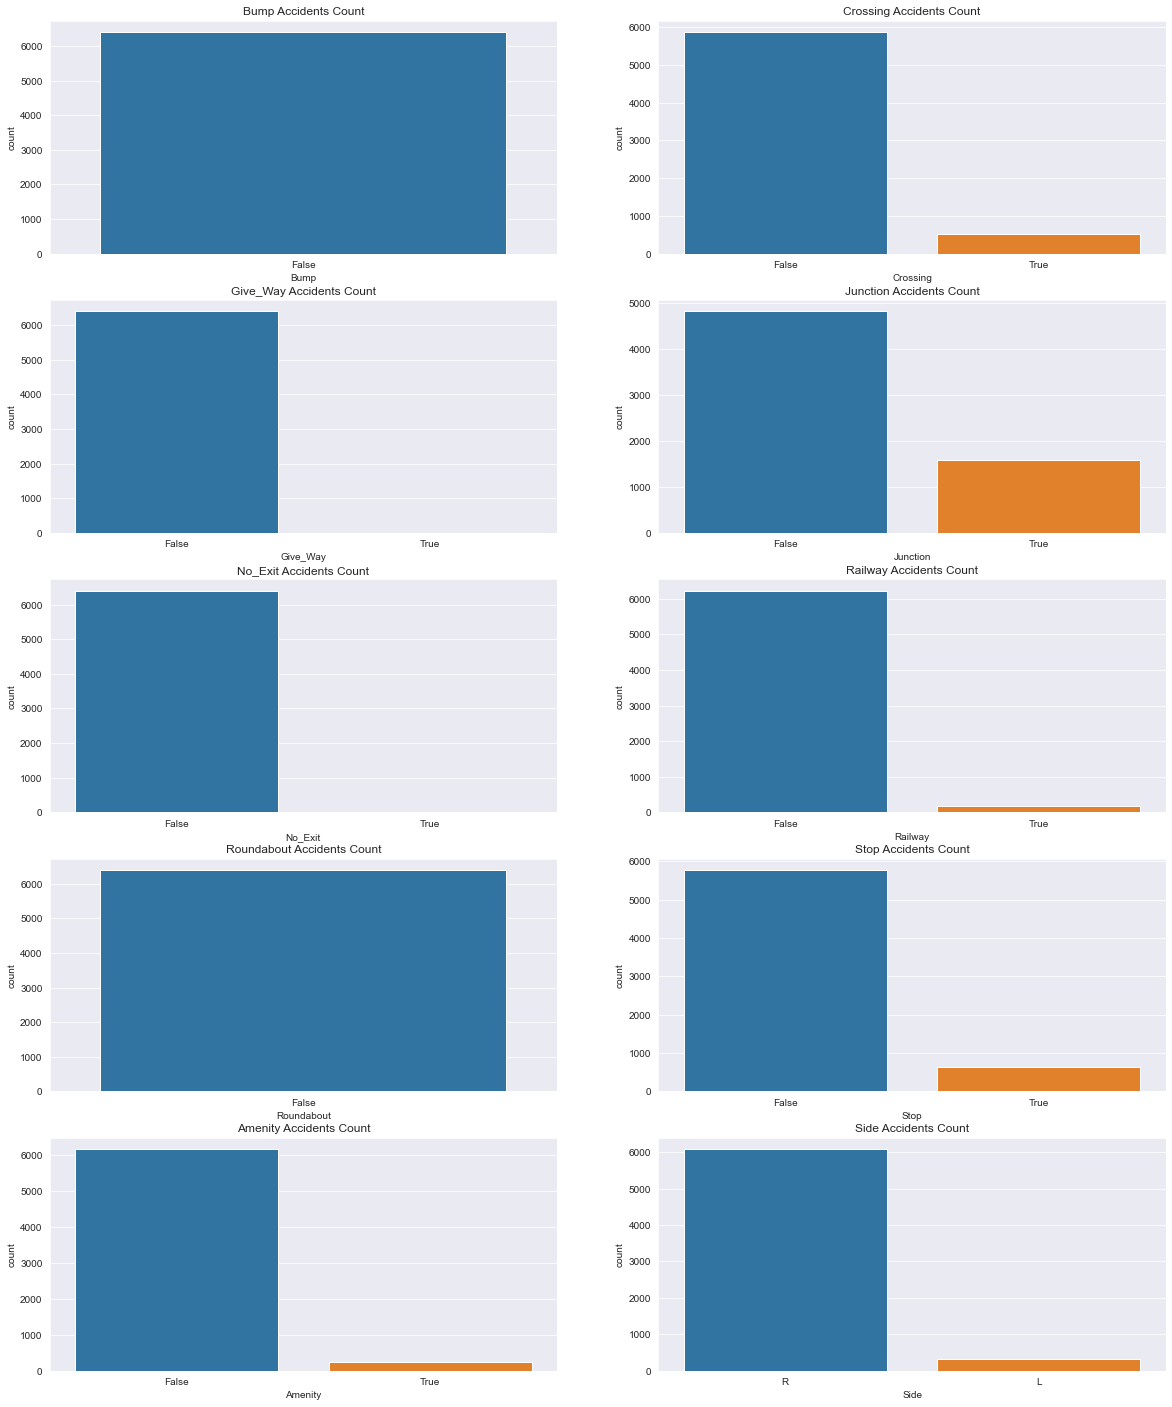

In [16]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=5, ncols=2)
fig.subplots_adjust(top=2)
ax = ax.flatten()
for i in range(len(categorical_data)):
    ax[i] = sns.countplot(x=categorical_data[i], data=train_df, ax= ax[i])
    ax[i].set_title(figure_names[i])
plt.show()

In [17]:
train_df.No_Exit.value_counts()

False    6406
True        1
Name: No_Exit, dtype: int64

In [18]:
train_df.columns

Index(['ID', 'Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'Timestamp', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Second'],
      dtype='object')

In [19]:
train_df.Give_Way.value_counts()

False    6404
True        3
Name: Give_Way, dtype: int64

* Some columns are bool with only 1 value
* No_Exit column has only 1 value with 1 True
* Give_way column has only 3 values with True

Therefore, its better to drop each of No_Exit, Bump, Give_Way, Roundabout

In [20]:
train_df.drop(columns=['ID', 'Bump', 'No_Exit', 'Give_Way', 'Roundabout'], inplace=True)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Lat           6407 non-null   float64       
 1   Lng           6407 non-null   float64       
 2   Distance(mi)  6407 non-null   float64       
 3   Crossing      6407 non-null   bool          
 4   Junction      6407 non-null   bool          
 5   Railway       6407 non-null   bool          
 6   Stop          6407 non-null   bool          
 7   Amenity       6407 non-null   bool          
 8   Side          6407 non-null   object        
 9   Severity      6407 non-null   int64         
 10  Timestamp     6407 non-null   datetime64[ns]
 11  Year          6407 non-null   int64         
 12  Month         6407 non-null   int64         
 13  Day           6407 non-null   int64         
 14  Hour          6407 non-null   int64         
 15  Minute        6407 non-null   int64   

In [22]:
train_df.Year.nunique()

5

In [23]:
train_df.Month.nunique()

12

In [24]:
train_df.Minute.nunique()

60

In [25]:
train_df.Second.nunique()

60

In [26]:
dates = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
figure_names = [x + ' Accidents Count' for x in dates]

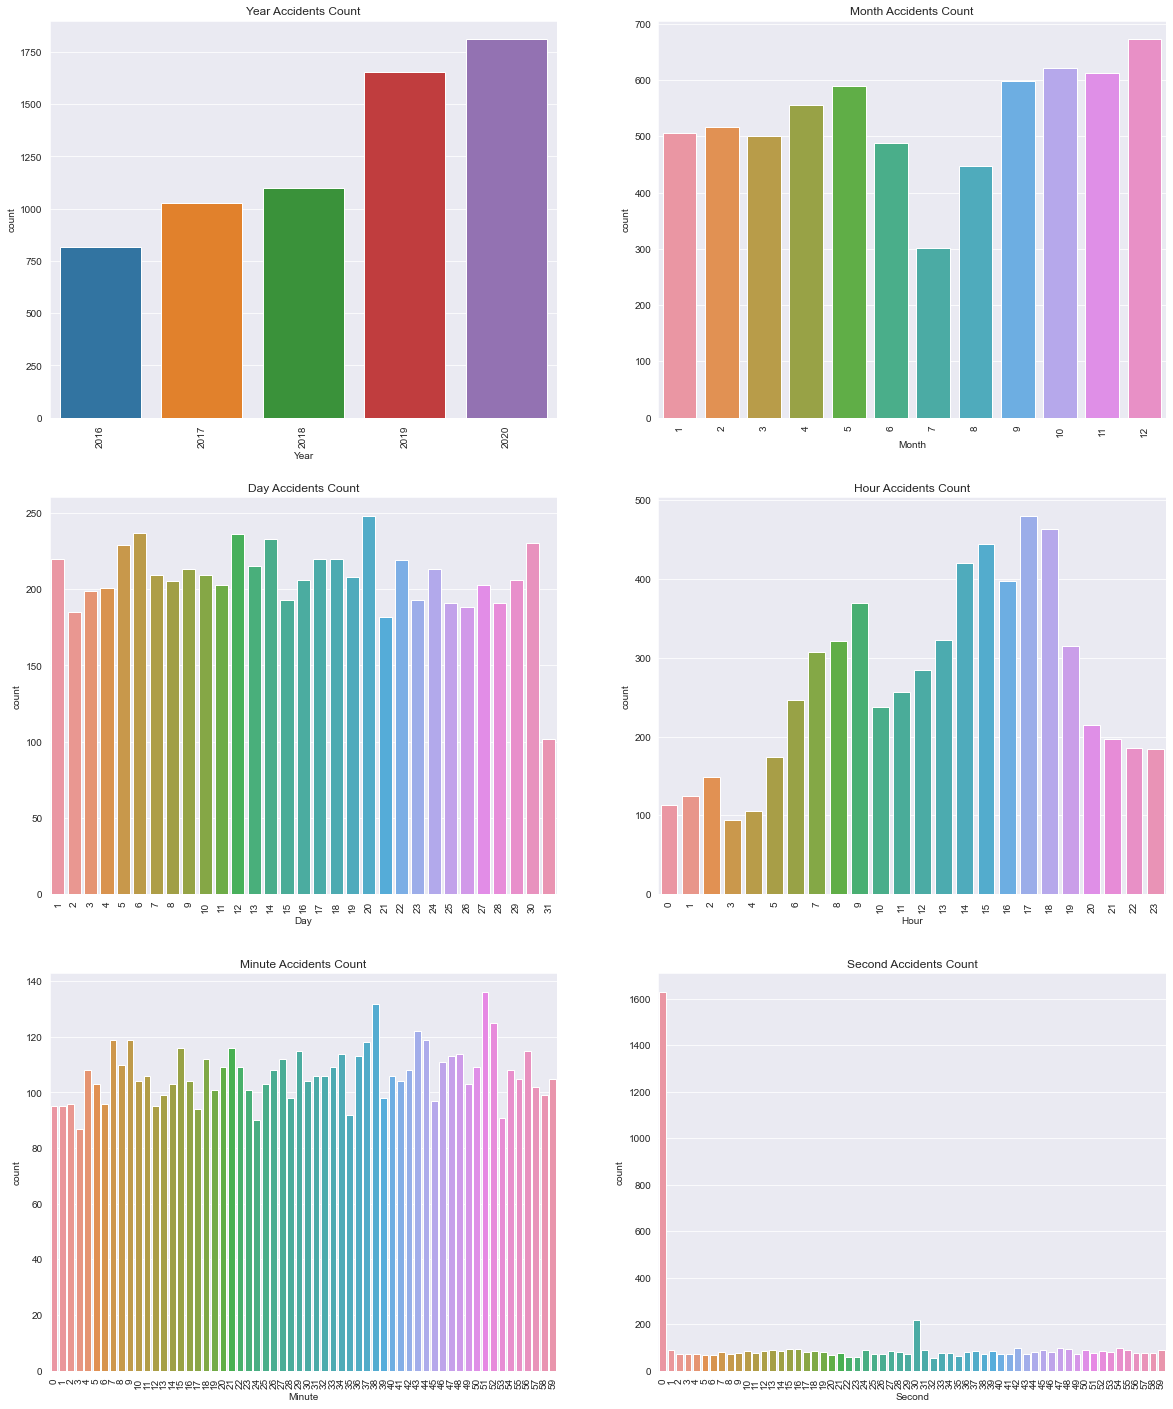

In [27]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=3, ncols=2)
fig.subplots_adjust(top=2)
ax = ax.flatten()
for i in range(len(dates)):
    ax[i] = sns.countplot(x=dates[i], data=train_df, ax= ax[i])
    ax[i].set_title(figure_names[i])
    ax[i].tick_params(axis='x', rotation=90)
plt.show()

* There is almost no Information in the minute feature
* The seconds feature has more data at 0 seconds which is normal because its harder to set the seconds exactly, so I think its better to drop that feature later on.
* The hour feature shows that there are less accidents at night, and more at morning hours, and its maximum at 18 which is also normal because its the end of the day, and everyone is running home.
* The day feature shows there is nothing special except for the day 31 of each month, and that might return that some months are 30 days and others are 31 days.
* The year feature shows that every year, the amount of accidents increases and thats normal because the amount of cars increase.

## Getting the day of the week name from the datetime object:

In [28]:
train_df['Day_Name'] = train_df.Timestamp.dt.day_name()

In [29]:
train_df.Day_Name.value_counts()

Thursday     1172
Wednesday    1150
Friday       1062
Tuesday       953
Monday        862
Saturday      636
Sunday        572
Name: Day_Name, dtype: int64

## Extracting the weekend from weekday:

In [30]:
train_df['Weekend'] = [1 if x in ['Saturday', 'Sunday'] else 0 for x in train_df.Day_Name]

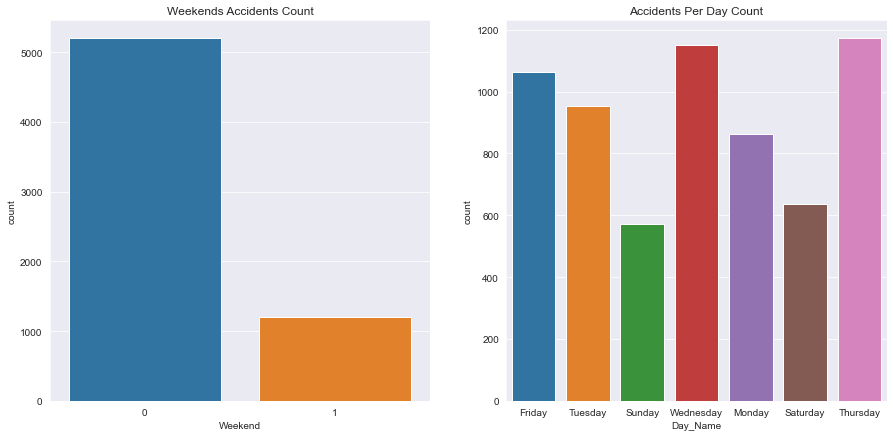

In [31]:
fig, ax = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
ax1 = sns.countplot(x='Weekend', data=train_df, ax=ax[0])
ax2 = sns.countplot(x='Day_Name', data=train_df, ax=ax[1])
ax1.set_title('Weekends Accidents Count')
ax2.set_title('Accidents Per Day Count')
plt.show()

* I think that the weekend feature is more relevant as it add more data.
* Weekday name feature didn't add much as they are somewhat close, so it will be better to drop it.

In [32]:
train_df.drop(columns='Day_Name', inplace=True)

In [33]:
numeric_data = train_df[['Lat', 'Lng', 'Severity']]

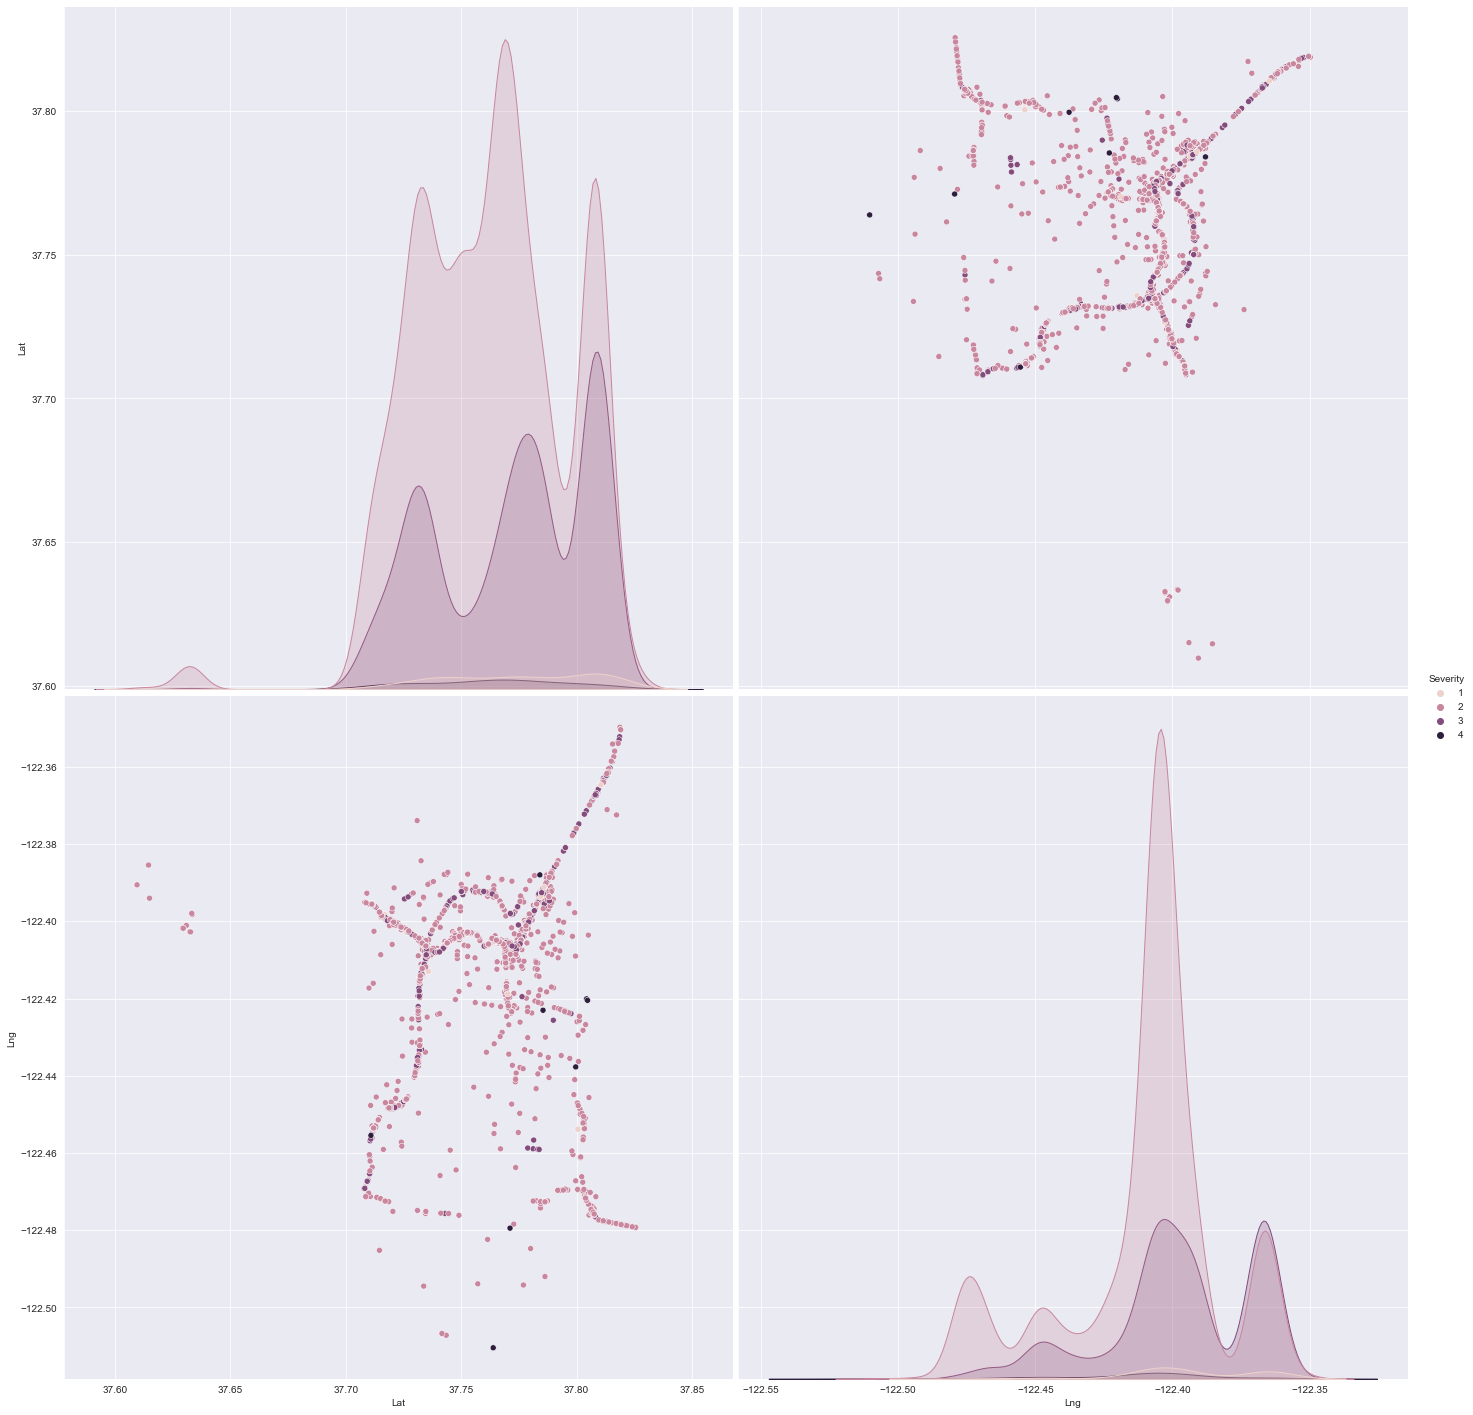

In [34]:
sns.pairplot(numeric_data, hue="Severity", height=10);

* There are outliers in long and lat data which needs to be dealt with.
* The long and lat distribution are far from Gaussian Distribution.
* The Severity are not equally distributed which needs to be more shown in plots.
* There is almost no relation between long and lat.

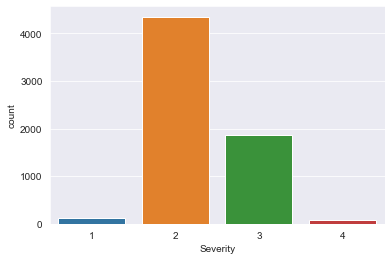

In [35]:
sns.countplot(x='Severity', data=train_df)
plt.show()

* As expected the Severity is equally distributed, which might cause bias in our predictions.

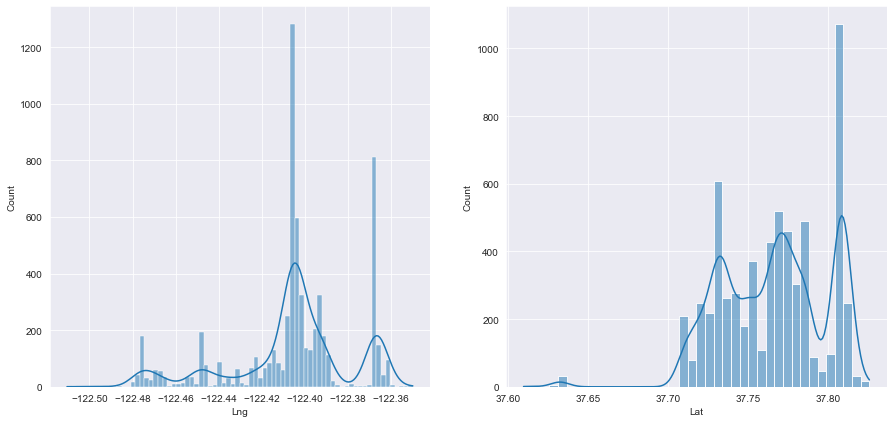

In [36]:
fig, ax = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
sns.histplot(data=train_df, x='Lng', ax=ax[0], kde=True)
sns.histplot(data=train_df, x='Lat', ax=ax[1], kde=True)
plt.show()

* Longitude and Latitude distributions are far from normal distribution.
* An outlier in Latitude is very obvious.

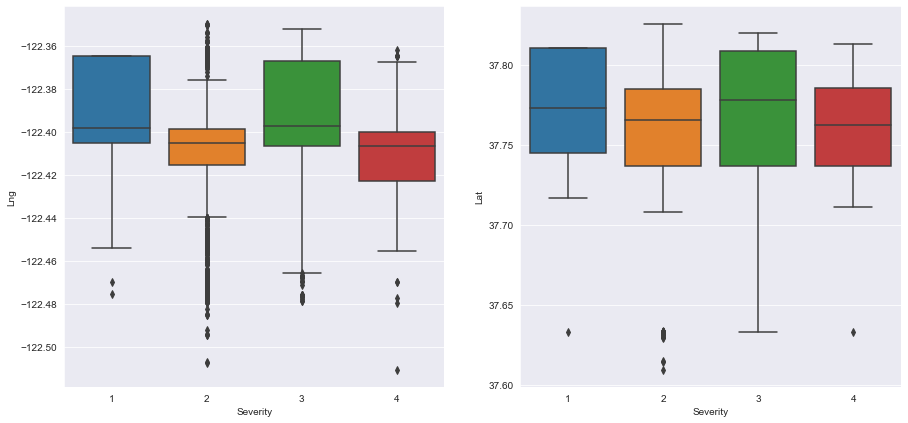

In [37]:
fig, ax = plt.subplots(figsize=(15,7), nrows=1, ncols=2)
sns.boxplot(x='Severity', y='Lng', data=train_df, ax=ax[0])
sns.boxplot(x='Severity', y='Lat', data=train_df, ax=ax[1])
plt.show()

* There are lots of outliers in Longitude and Latitude.

In [38]:
train_df.duplicated().sum()

14

In [86]:
trained_clean = train_df.drop_duplicates(keep='last')

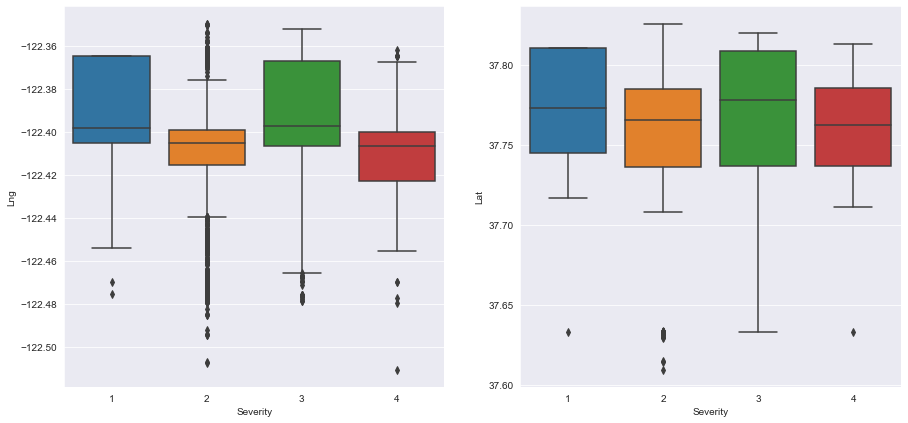

In [87]:
fig, ax = plt.subplots(figsize=(15,7), nrows=1, ncols=2)
sns.boxplot(x='Severity', y='Lng', data=trained_clean, ax=ax[0])
sns.boxplot(x='Severity', y='Lat', data=trained_clean, ax=ax[1])
plt.show()

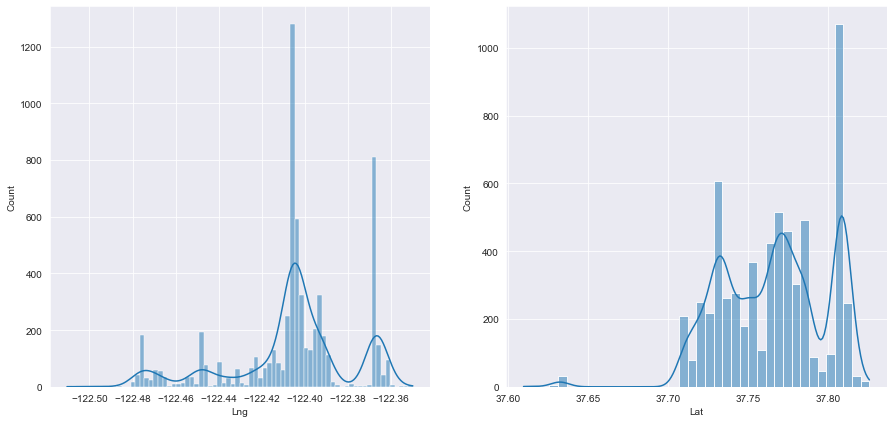

In [88]:
fig, ax = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
sns.histplot(data=trained_clean, x='Lng', ax=ax[0], kde=True)
sns.histplot(data=trained_clean, x='Lat', ax=ax[1], kde=True)
plt.show()

* Almost no difference when duplicates removed in

In [187]:
trained_clean = train_df.drop_duplicates(keep='last')

In [177]:
# def remove_outliers(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     print(fence_low)
#     fence_high = q3+1.5*iqr
#     print(fence_high)
#     median_number = df_in[col_name].median()
#     print(median_number)
#     df_in.loc[((df_in[col_name] < fence_low) & (df_in[col_name] > fence_high)), col_name] = median_number

In [178]:
# remove_outliers(trained_clean, 'Lng')

In [199]:
q1 = trained_clean['Lat'].quantile(0.25)
q3 = trained_clean['Lat'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
median_number = trained_clean['Lat'].median()
trained_clean[(trained_clean['Lat'] < q1) & (trained_clean['Lat'] > q3)]
# trained_clean.loc[(trained_clean['Lat'] < q1) & (trained_clean['Lat'] > q3), 'Lat'] = np.nan

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,Timestamp,Year,Month,Day,Hour,Minute,Second,Weekend


In [200]:
trained_clean.head()

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Side,Severity,Timestamp,Year,Month,Day,Hour,Minute,Second,Weekend
0,37.762150,-122.405660,0.044,False,False,False,False,True,R,2,2016-03-25 15:13:02,2016,3,25,15,13,2,0
1,37.719157,-122.448254,0.000,False,False,False,False,False,R,2,2020-05-05 19:23:00,2020,5,5,19,23,0,0
2,37.808498,-122.366852,0.000,False,False,False,True,False,R,3,2016-09-16 19:57:16,2016,9,16,19,57,16,0
3,37.785930,-122.391080,0.009,False,True,False,False,False,R,1,2020-03-29 19:48:43,2020,3,29,19,48,43,1
4,37.719141,-122.448457,0.000,False,False,False,False,False,R,2,2019-10-09 08:47:00,2019,10,9,8,47,0,0


In [180]:
train_df.describe()

,Lat,Lng,Distance(mi),Severity,Year,Month,Day,Hour,Minute,Second,Weekend
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429,2018.407835,6.744498,15.656626,12.873888,29.958327,22.699391,0.188544
std,0.032555,0.028275,0.396360,0.521225,1.375794,3.568445,8.750849,5.824203,17.188764,19.698045,0.391176
min,37.609619,-122.510440,0.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,37.737096,-122.412210,0.000000,2.000000,2017.000000,4.000000,8.000000,8.000000,15.000000,0.000000,0.000000
50%,37.768238,-122.404835,0.000000,2.000000,2019.000000,7.000000,16.000000,14.000000,30.000000,21.000000,0.000000
75%,37.787813,-122.392477,0.041000,3.000000,2020.000000,10.000000,23.000000,17.000000,45.000000,40.000000,0.000000
max,37.825626,-122.349734,6.820000,4.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,59.000000,1.000000


In [181]:
trained_clean.describe()

,Lat,Lng,Distance(mi),Severity,Year,Month,Day,Hour,Minute,Second,Weekend
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.00000
mean,37.765622,-122.406004,0.133817,2.294072,2018.404349,6.734241,15.654622,12.872986,29.960738,22.744408,0.18880
std,0.032567,0.028277,0.394554,0.521614,1.375278,3.565397,8.748283,5.818501,17.193640,19.692752,0.39138
min,37.609619,-122.510440,0.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,37.736931,-122.412216,0.000000,2.000000,2017.000000,4.000000,8.000000,8.000000,15.000000,0.000000,0.00000
50%,37.768227,-122.404835,0.000000,2.000000,2019.000000,7.000000,16.000000,14.000000,30.000000,21.000000,0.00000
75%,37.787760,-122.392484,0.039000,3.000000,2020.000000,10.000000,23.000000,17.000000,45.000000,40.000000,0.00000
max,37.825626,-122.349734,6.820000,4.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,59.000000,1.00000


In [182]:
trained_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393 entries, 0 to 6406
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Lat           6393 non-null   float64       
 1   Lng           6393 non-null   float64       
 2   Distance(mi)  6393 non-null   float64       
 3   Crossing      6393 non-null   bool          
 4   Junction      6393 non-null   bool          
 5   Railway       6393 non-null   bool          
 6   Stop          6393 non-null   bool          
 7   Amenity       6393 non-null   bool          
 8   Side          6393 non-null   object        
 9   Severity      6393 non-null   int64         
 10  Timestamp     6393 non-null   datetime64[ns]
 11  Year          6393 non-null   int64         
 12  Month         6393 non-null   int64         
 13  Day           6393 non-null   int64         
 14  Hour          6393 non-null   int64         
 15  Minute        6393 non-null   int64   